## WeRateDogs act_report

### Analyzing Data

After cleaning the dataset, I was able to analyze and visualize insights as shown below

### Insights

1. What is the most common dog breed?

    ANSWER = golden_retriever
    

2. What is the most common dog stage?

    ANSWER = pupper
    

3. What dog stage has the highest average retweet_count?

    ANSWER = puppo
    

4. What are the most common dog names?

    ANSWER = Lucy
    

5. What are the most common tweet sources?

    ANSWER = Twitter for iPhone
    

6. Who are the top 5 favorite golden retrievers?

    ANSWER = Zoey, Barney, Bella, Alfy, dog id - 795464331001561088
    

7. what is the correlation between retweet and favorite count?

        ANSWER = 0.9143525

In [1]:
# Importing libraries
# Importing all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import json
import requests
import os
import tweepy
import json
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from io import BytesIO
import warnings
import re
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Importing the clean dataset into dataframe
Twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1598 non-null   int64  
 1   timestamp       1598 non-null   object 
 2   source          1598 non-null   object 
 3   text            1598 non-null   object 
 4   names           1178 non-null   object 
 5   stage           243 non-null    object 
 6   jpg_url         1598 non-null   object 
 7   img_num         1598 non-null   int64  
 8   dog_breed       1598 non-null   object 
 9   confidence      1598 non-null   float64
 10  retweet_count   1598 non-null   int64  
 11  favorite_count  1598 non-null   int64  
 12  rating          1598 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 162.4+ KB


''

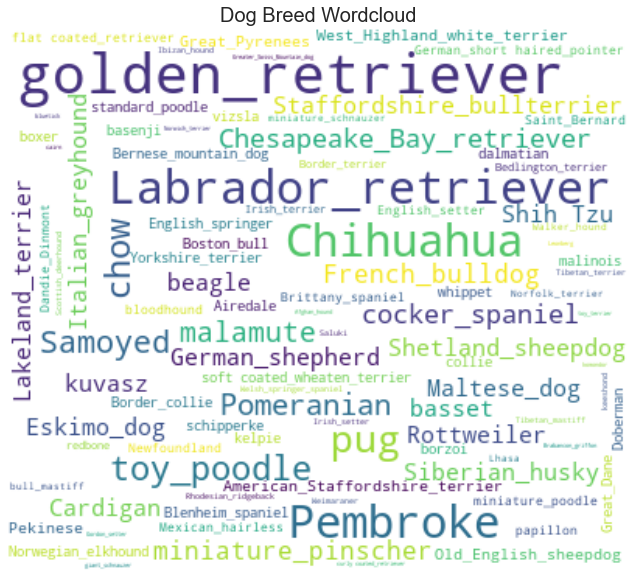

In [5]:
# Wordcloud for dog_breed visualization:
text = Twitter_archive_clean.loc[:, 'dog_breed'].str.cat(others=None, sep=' ')

# Instantiate word cloud object
wordcloud = WordCloud(background_color='white', max_words=200,  stopwords=STOPWORDS,
              width=400, height=350,contour_width=0.1, 
                      contour_color='green')

# Generate word cloud
wordcloud.generate(text)
# Show word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Dog Breed Wordcloud', fontsize=20)
plt.axis('off')
;

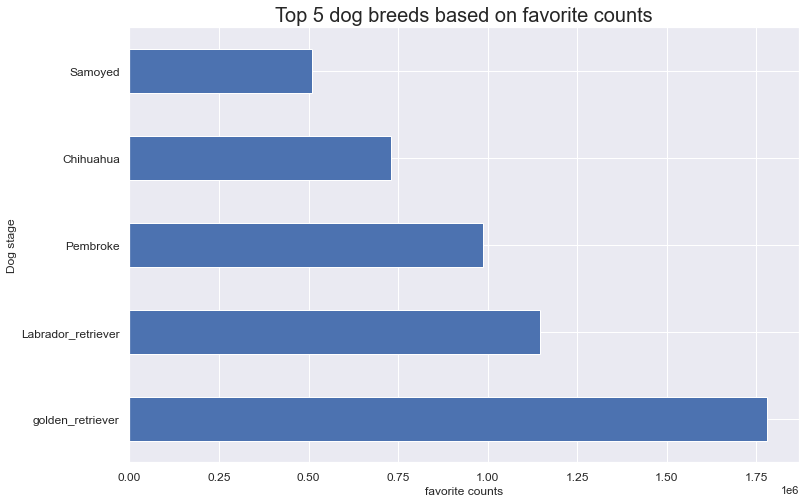

In [7]:
#plotting an horizontal bar chart to show top 5 dog breed by favorite counts
top_breed = Twitter_archive_clean.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=True).nlargest(5)
plt.figure(figsize=(12,8))
plt.title("Top 5 dog breeds based on favorite counts", size=20)
top_breed.plot(kind='barh',fontsize=12,color='b')
plt.xlabel('favorite counts', fontsize=12)
plt.ylabel('Dog stage', fontsize=12);
sns.set_style("whitegrid");

In [8]:
# The top favorite golden retrieversand their ratings
Golden_retriever= Twitter_archive_clean.query('dog_breed == "golden_retriever"')

Golden_retriever.sort_values(by='favorite_count', ascending = False,inplace=True)

Top_5=Golden_retriever[['names','tweet_id','favorite_count','stage','jpg_url','rating']].head()
Top_5

/var/folders/qx/qytfv1295sv69kxppzc23gpm0000gn/T/ipykernel_35601/3933138539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Golden_retriever.sort_values(by='favorite_count', ascending = False,inplace=True)


,names,tweet_id,favorite_count,stage,jpg_url,rating
311,Zoey,870374049280663552,85011,NaN,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,13/10
6,NaN,795464331001561088,55683,doggo,https://pbs.twimg.com/ext_tw_video_thumb/79546...,13/10
36,Barney,846514051647705089,48410,doggo,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,13/10
274,Bella,883482846933004288,46860,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,5/10
278,Alfy,882268110199369728,45880,NaN,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,13/10


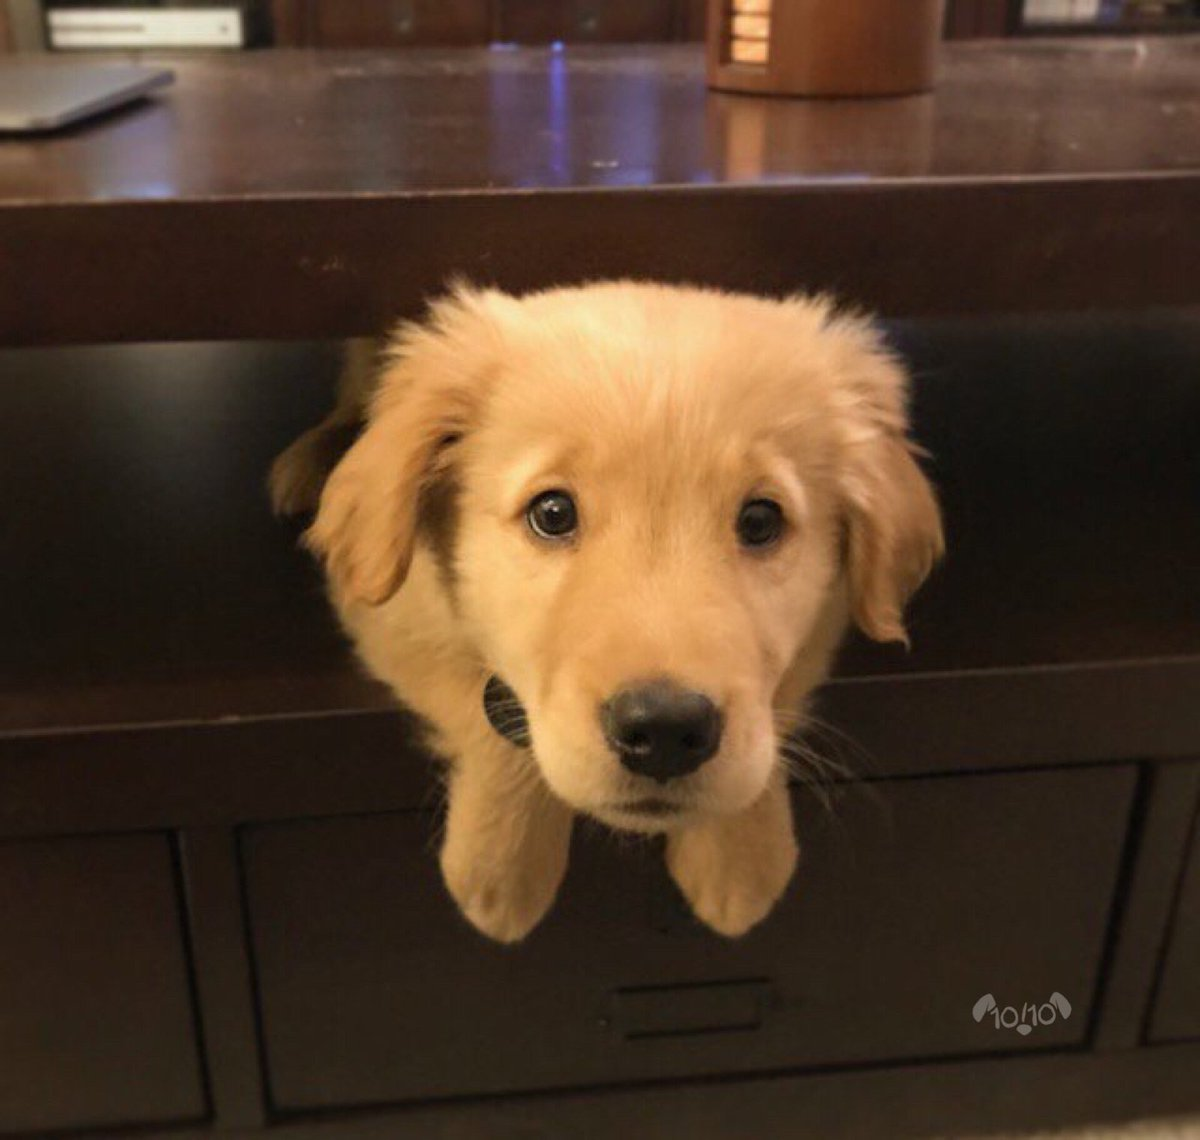

In [9]:
#loading image of the favorite no 1 golden retriever
#First one
url = Top_5.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

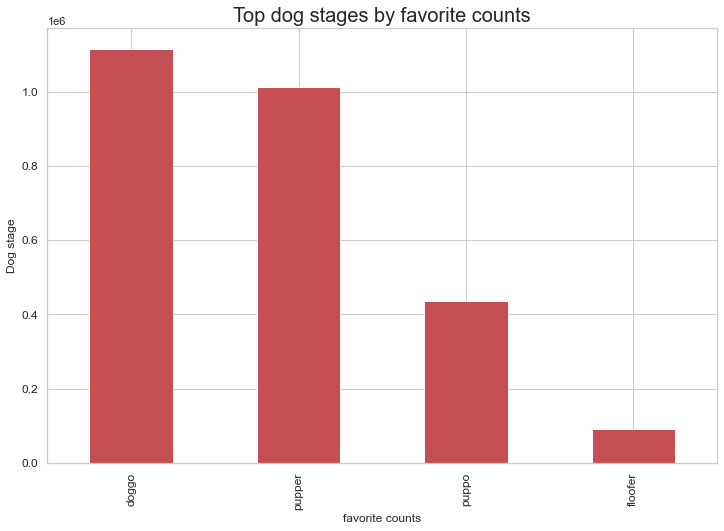

In [10]:
#plotting a bar chart to show top 5 dog breed by favorite counts
top_stage = Twitter_archive_clean.groupby('stage')['favorite_count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.title("Top dog stages by favorite counts", size=20)
top_stage.plot(kind='bar',fontsize=12,color='r')
plt.xlabel('favorite counts', fontsize=12)
plt.ylabel('Dog stage', fontsize=12);
sns.set_style("whitegrid");

The Correlation Between favorite counts And retweet counts is  0.9144390055498242


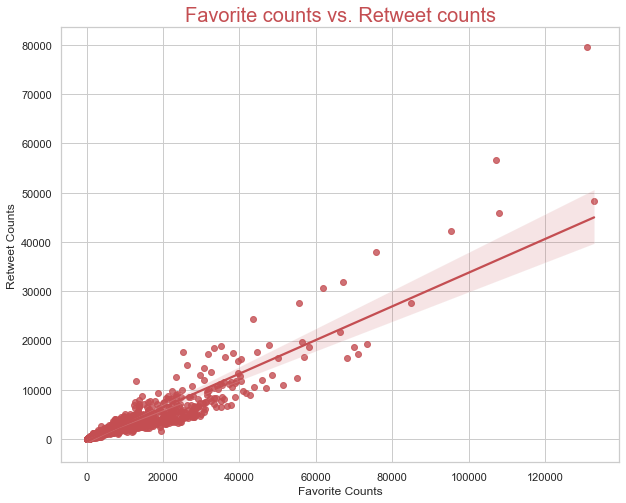

In [12]:
#The Correlation Between favorite counts And retweet counts
sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid")
sns.regplot(x='favorite_count', y='retweet_count', data=Twitter_archive_clean, color="r")

plt.title("Favorite counts vs. Retweet counts",color="r", size=20)
plt.ylabel("Retweet Counts", size=12)
plt.xlabel("Favorite Counts", size=12);

data_corr = Twitter_archive_clean.corr()

print("The Correlation Between favorite counts And retweet counts is ",data_corr.loc['favorite_count','retweet_count']);
